In [120]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd

In [121]:
data = pd.read_csv("loan.csv")
data.rename(columns=lambda x: x.strip(), inplace=True)
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [122]:
modified_data = data.copy(deep=True)
modified_data.education.replace((" Graduate", " Not Graduate"), (1, 0), inplace=True)
modified_data.self_employed.replace((" Yes", " No"), (1, 0), inplace=True)
modified_data.loan_status.replace((" Approved", " Rejected"), (1, 0), inplace=True)
modified_data.drop_duplicates()
modified_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [123]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(modified_data)
scaled_data = pd.DataFrame(data = scaled_features, columns = data.columns)
scaled_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0.000000,0.4,1.0,0.0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,1.0
1,0.000234,0.0,0.0,1.0,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,0.0
2,0.000469,0.6,1.0,0.0,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,0.0
3,0.000703,0.6,1.0,0.0,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,0.0
4,0.000937,1.0,0.0,1.0,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,0.0


In [124]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.05)
selected_features = selector.fit_transform(scaled_data)
selected_columns = selector.get_support(indices=True)
selected_data = pd.DataFrame(data = selected_features, columns=[data.columns.tolist()[ind] for ind in selected_columns])
selected_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,commercial_assets_value,luxury_assets_value,loan_status
0,0.000000,0.4,1.0,0.0,0.969072,0.755102,0.555556,0.796667,0.907216,0.575835,1.0
1,0.000234,0.0,0.0,1.0,0.402062,0.303571,0.333333,0.195000,0.113402,0.218509,0.0
2,0.000469,0.6,1.0,0.0,0.917526,0.750000,1.000000,0.343333,0.231959,0.848329,0.0
3,0.000703,0.6,1.0,0.0,0.824742,0.775510,0.333333,0.278333,0.170103,0.591260,0.0
4,0.000937,1.0,0.0,1.0,0.989691,0.609694,1.000000,0.136667,0.422680,0.748072,0.0


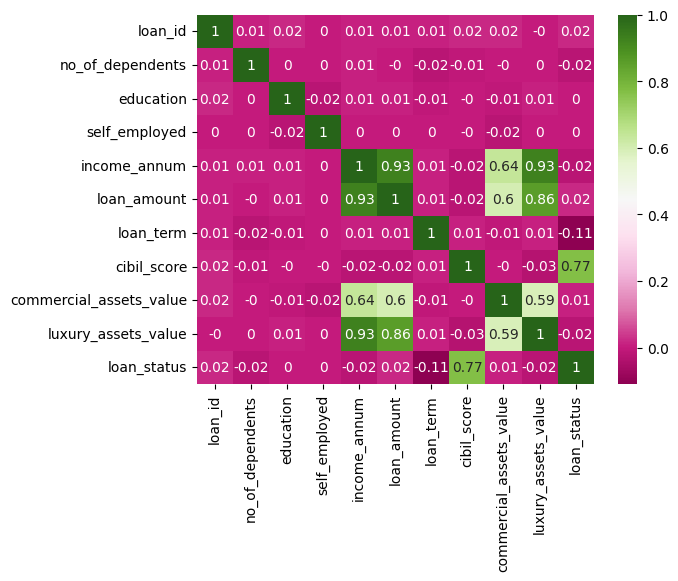

In [125]:
corr_matr = selected_data.corr().round(2)
corr_heatmap = sb.heatmap(corr_matr, cmap="PiYG", annot=True)
plt.show()

In [126]:
final_data = selected_data.drop(columns=["loan_amount", "luxury_assets_value"])
final_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_term,cibil_score,commercial_assets_value,loan_status
0,0.000000,0.4,1.0,0.0,0.969072,0.555556,0.796667,0.907216,1.0
1,0.000234,0.0,0.0,1.0,0.402062,0.333333,0.195000,0.113402,0.0
2,0.000469,0.6,1.0,0.0,0.917526,1.000000,0.343333,0.231959,0.0
3,0.000703,0.6,1.0,0.0,0.824742,0.333333,0.278333,0.170103,0.0
4,0.000937,1.0,0.0,1.0,0.989691,1.000000,0.136667,0.422680,0.0


In [127]:
rows_count = len(modified_data["loan_id"])
train_count = round(0.8 * rows_count)
print(rows_count, train_count)

4269 3415


In [128]:
modified_data_train = modified_data[0:train_count]
modified_data_test = modified_data[train_count:rows_count]

final_data_train = final_data[0:train_count]
final_data_test = final_data[train_count:rows_count]

In [129]:
y_modified_data_train = modified_data_train.loan_status.values
x_modified_data_train = modified_data_train.drop(columns="loan_status")
y_modified_data_test = modified_data_test.loan_status.values
x_modified_data_test = modified_data_test.drop(columns="loan_status")

y_final_data_train = final_data_train.loan_status.values
x_final_data_train = final_data_train.drop(columns="loan_status")
y_final_data_test = final_data_test.loan_status.values
x_final_data_test = final_data_test.drop(columns="loan_status")

Метод опорных векторов

In [130]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [131]:
clf = SVC()
clf.fit(x_modified_data_train, y_modified_data_train)
y_mod_data_pred = clf.predict(x_modified_data_test)
compare_res = pd.DataFrame({"real":y_modified_data_test, "predicted":y_mod_data_pred})
acc = round(accuracy_score(y_modified_data_test, y_mod_data_pred) * 100, 2)
print('Верно идентифицировано (%):', acc)

Верно идентифицировано (%): 64.99


In [132]:
clf.fit(x_final_data_train, y_final_data_train)
y_final_data_pred = clf.predict(x_final_data_test)
compare_res = pd.DataFrame({"real":y_final_data_test, "predicted":y_final_data_pred})
acc = round(accuracy_score(y_final_data_test, y_final_data_pred) * 100, 2)
print('Верно идентифицировано (%):', acc)

Верно идентифицировано (%): 94.15
